In [2]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.6.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.2 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 12.1 MB/s eta 0:00:00m eta 0:00:010:01:01

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import json
import statistics

In [29]:
denv_path = '../GREAC/benchmark_results_denv_eq.csv'
sars_path = 'benchmark_results_covid_2.csv'
# hiv_path = '../HIV/classify/predictions/'

In [27]:
denv = pd.read_csv(sars_path)
denv = denv[(denv['wndwPercent'] == 0.002) & (denv['metric'] == "kld")]
# hiv = pd.read_csv(hiv_path + 'metrics.csv')
denv

,wndwPercent,metric,windows,window_size,max_seq_windows,kmerset,Omicron,Beta,Epsilon,Eta,...,Delta,Kappa,Iota,Alpha,macro_f1,macro_precision,macro_recall,micro_f1,micro_precision,micro_recall
41,0.002,kld,59,60,29847,611,0.9966,0.9886,0.9988,0.8235,...,0.9934,0.8172,0.9969,0.9991,0.9520,0.9190,0.9974,0.9975,0.9975,0.9975
57,0.002,kld,61,60,29847,612,0.9972,0.9409,0.9985,0.8024,...,0.9921,0.5547,0.9952,0.9995,0.9266,0.8924,0.9935,0.9975,0.9975,0.9975
73,0.002,kld,59,59,29845,638,0.9974,0.9908,0.9990,0.8080,...,0.9960,0.8636,0.9974,0.9996,0.9647,0.9427,0.9961,0.9982,0.9982,0.9982
149,0.002,kld,67,60,29845,670,0.9976,0.9951,0.9988,0.7244,...,0.9976,1.0000,0.9973,0.9993,0.9696,0.9530,0.9980,0.9978,0.9978,0.9978
165,0.002,kld,53,60,29845,620,0.9979,0.9758,0.9980,0.9464,...,0.9933,0.7451,0.9969,0.9989,0.9620,0.9415,0.9931,0.9979,0.9979,0.9979
181,0.002,kld,58,60,29845,629,0.9990,0.9789,0.9983,0.9261,...,0.9934,0.5241,0.9997,0.9996,0.9244,0.8882,0.9974,0.9987,0.9987,0.9987
245,0.002,kld,52,60,29847,652,0.9829,0.9679,0.9993,0.6685,...,0.9948,0.8172,0.9988,0.9922,0.8975,0.8489,0.9952,0.9884,0.9884,0.9884
261,0.002,kld,64,60,29844,711,0.9977,0.9696,0.9994,0.9529,...,0.9954,0.7308,0.9965,0.9996,0.9384,0.9014,0.9980,0.9981,0.9981,0.9981
277,0.002,kld,61,60,29847,673,0.9969,0.9030,0.9951,0.7808,...,0.9920,0.5891,0.9975,0.9995,0.9228,0.8844,0.9947,0.9971,0.9971,0.9971
293,0.002,kld,64,59,29845,660,0.9910,0.9934,0.9992,0.9843,...,0.9918,0.5101,0.9996,0.9947,0.9396,0.9193,0.9926,0.9933,0.9933,0.9933


In [5]:
#wndwPercent,metric,windows,kmerset,window_size,max_seq_windows,type3,type1,type4,type2,macro_f1,macro_precision,macro_recall,micro_f1,micro_precision,micro_recall
metrics = ['windows','macro_precision', 'macro_recall', 'macro_f1', 'micro_f1']
for metric in metrics:
    print(f'DENV {metric}: {denv[metric].mean():.4f} ({denv[metric].std():.4f})')
print('-------------------')
# for metric in metrics:
#     print(f'HIV {metric}: {hiv[metric].mean():.4f} ({hiv[metric].std():.4f})')
# print('-------------------')

DENV windows: 67.2700 (2.3735)
DENV macro_precision: 0.8712 (0.0166)
DENV macro_recall: 0.9696 (0.0055)
DENV macro_f1: 0.9063 (0.0150)
DENV micro_f1: 0.9551 (0.0076)
-------------------


In [19]:
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 300


df = pd.read_csv(sars_path + 'covid_2.csv')#'denv_eq.csv')

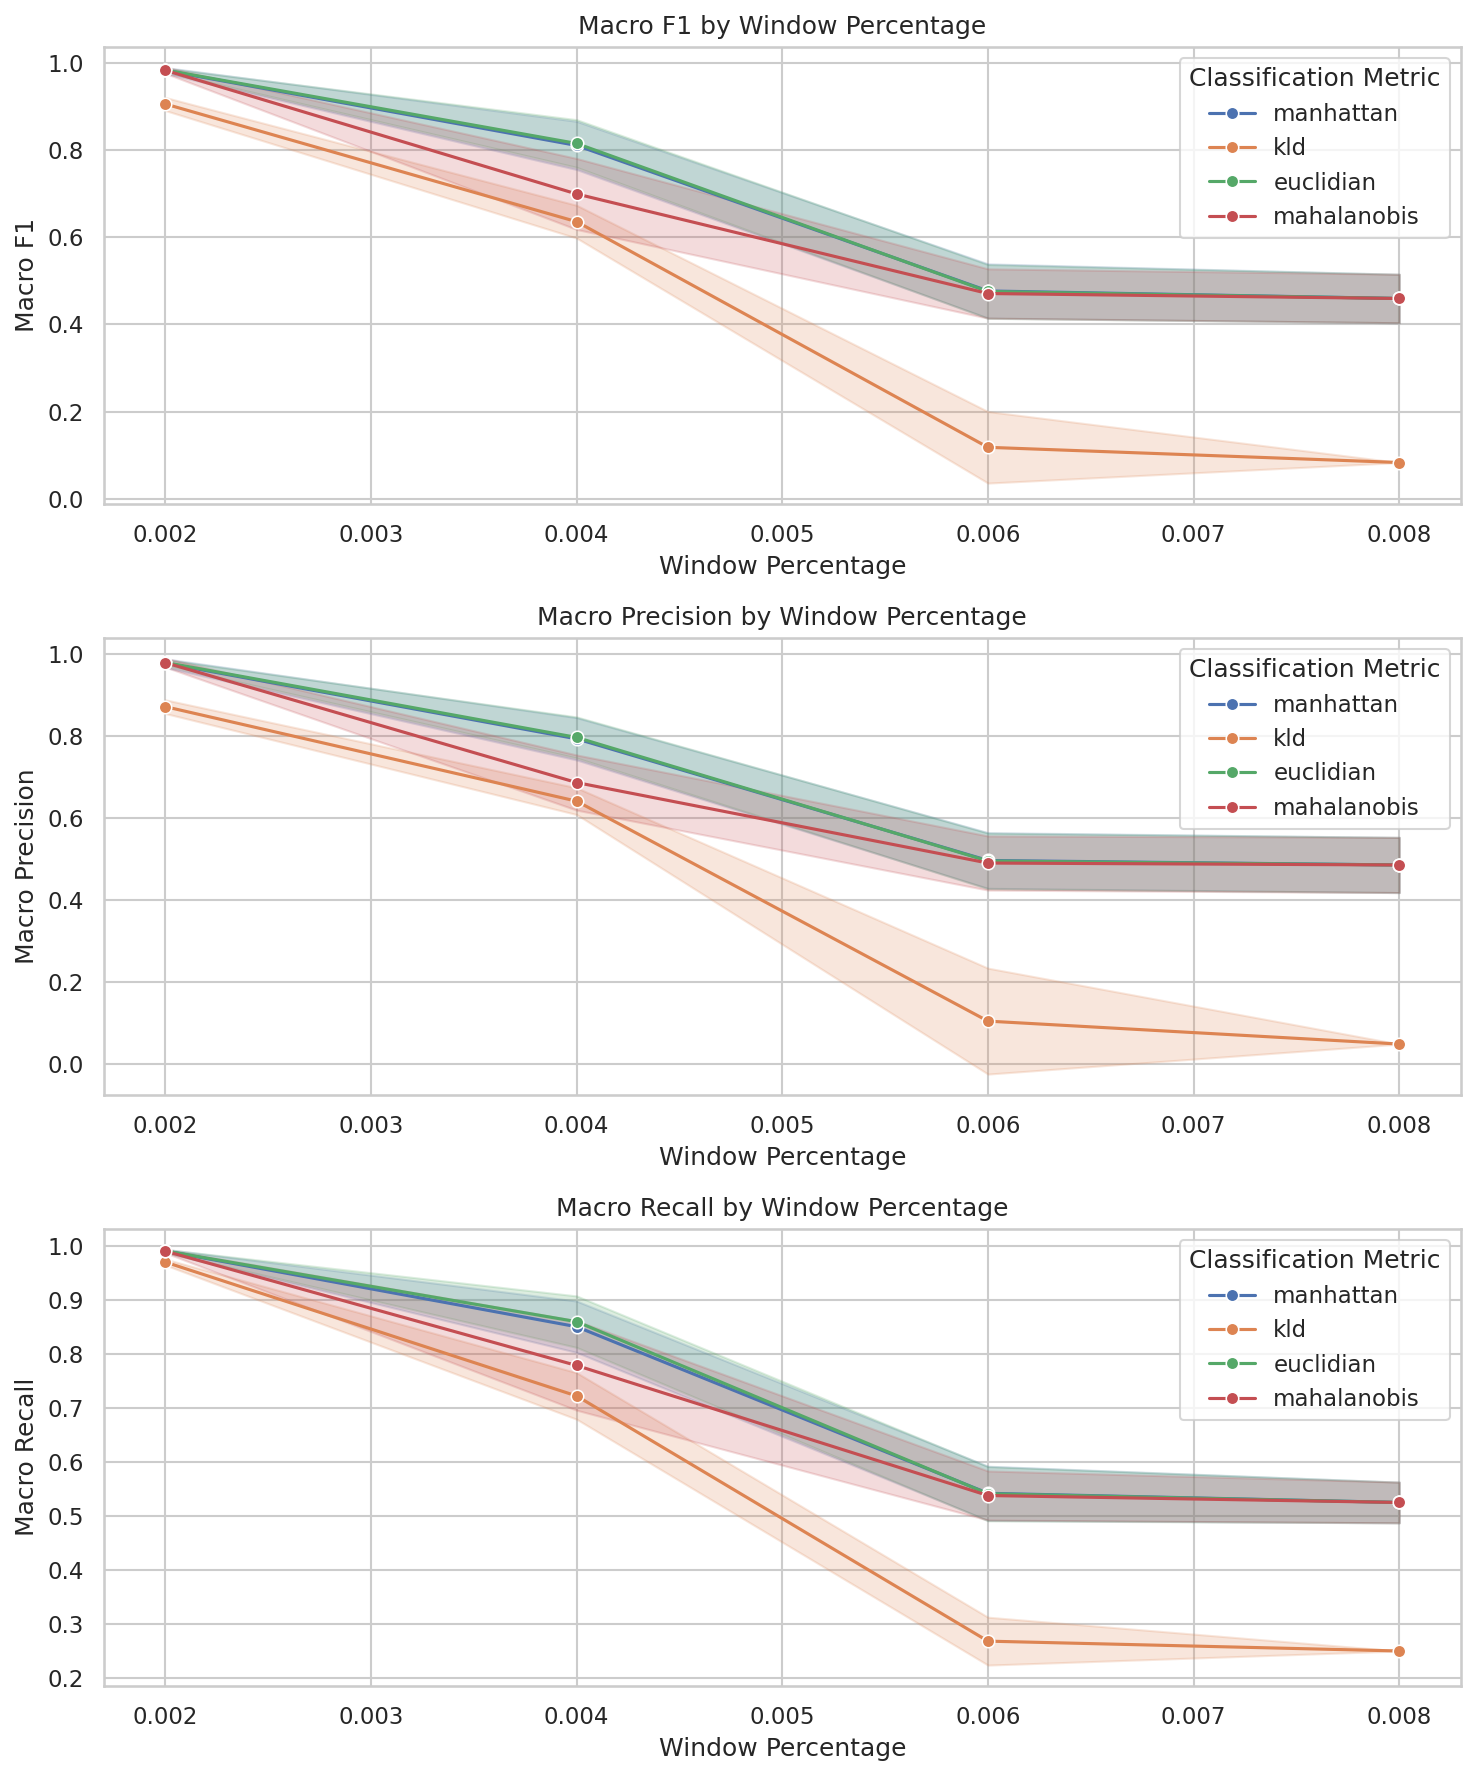

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for ax, metric in zip(axes, ['macro_f1', 'macro_precision', 'macro_recall']):
    sns.lineplot(data=df, x='wndwPercent', y=metric, hue='metric', ax=ax, 
                errorbar='sd', estimator='mean', marker='o')
    ax.set_title(f"{' '.join(metric.split('_')).title()} by Window Percentage")
    ax.set_xlabel("Window Percentage")
    ax.set_ylabel(metric.replace('_', ' ').title())
    ax.legend(title='Classification Metric')
plt.tight_layout()
plt.show()

#### 2. Metric Comparison Boxplot

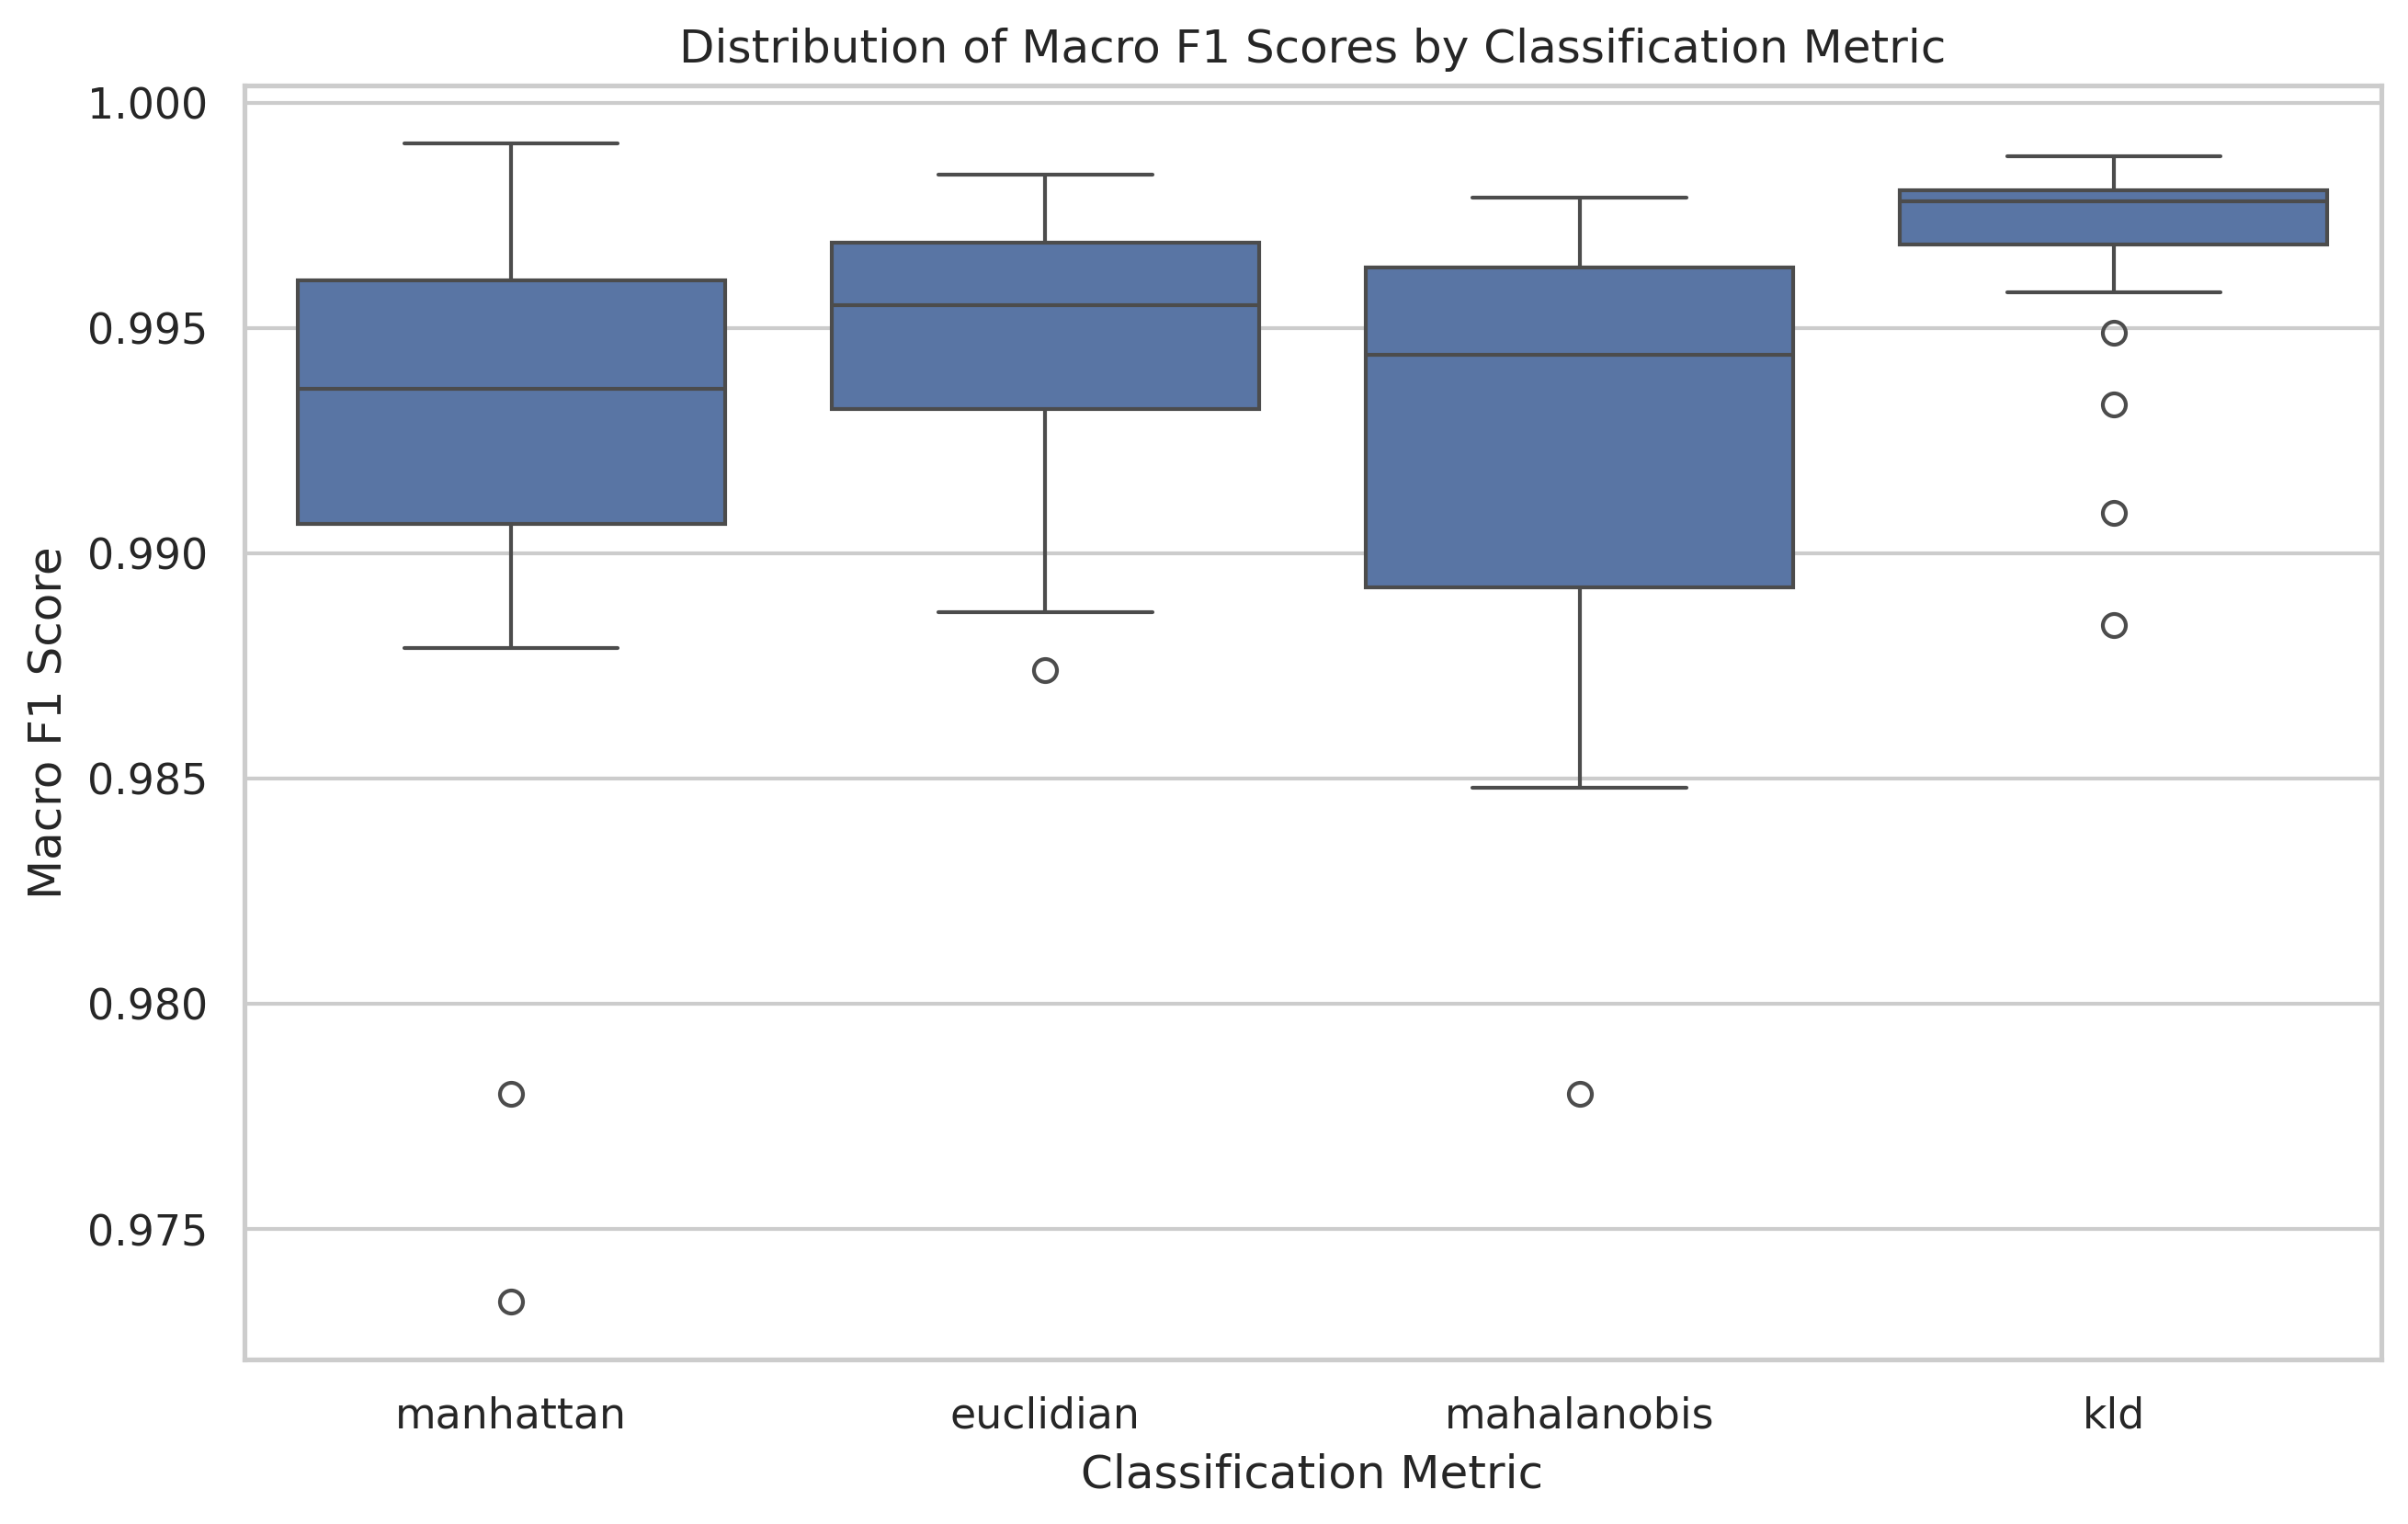

In [23]:
denv = df[(df['wndwPercent'] == 0.002)]
plt.figure(figsize=(10, 6))
sns.boxplot(data=denv, x='metric', y='micro_f1')
plt.title("Distribution of Macro F1 Scores by Classification Metric")
plt.xlabel("Classification Metric")
plt.ylabel("Macro F1 Score")
plt.show()

#### 3. Feature Count Analysis

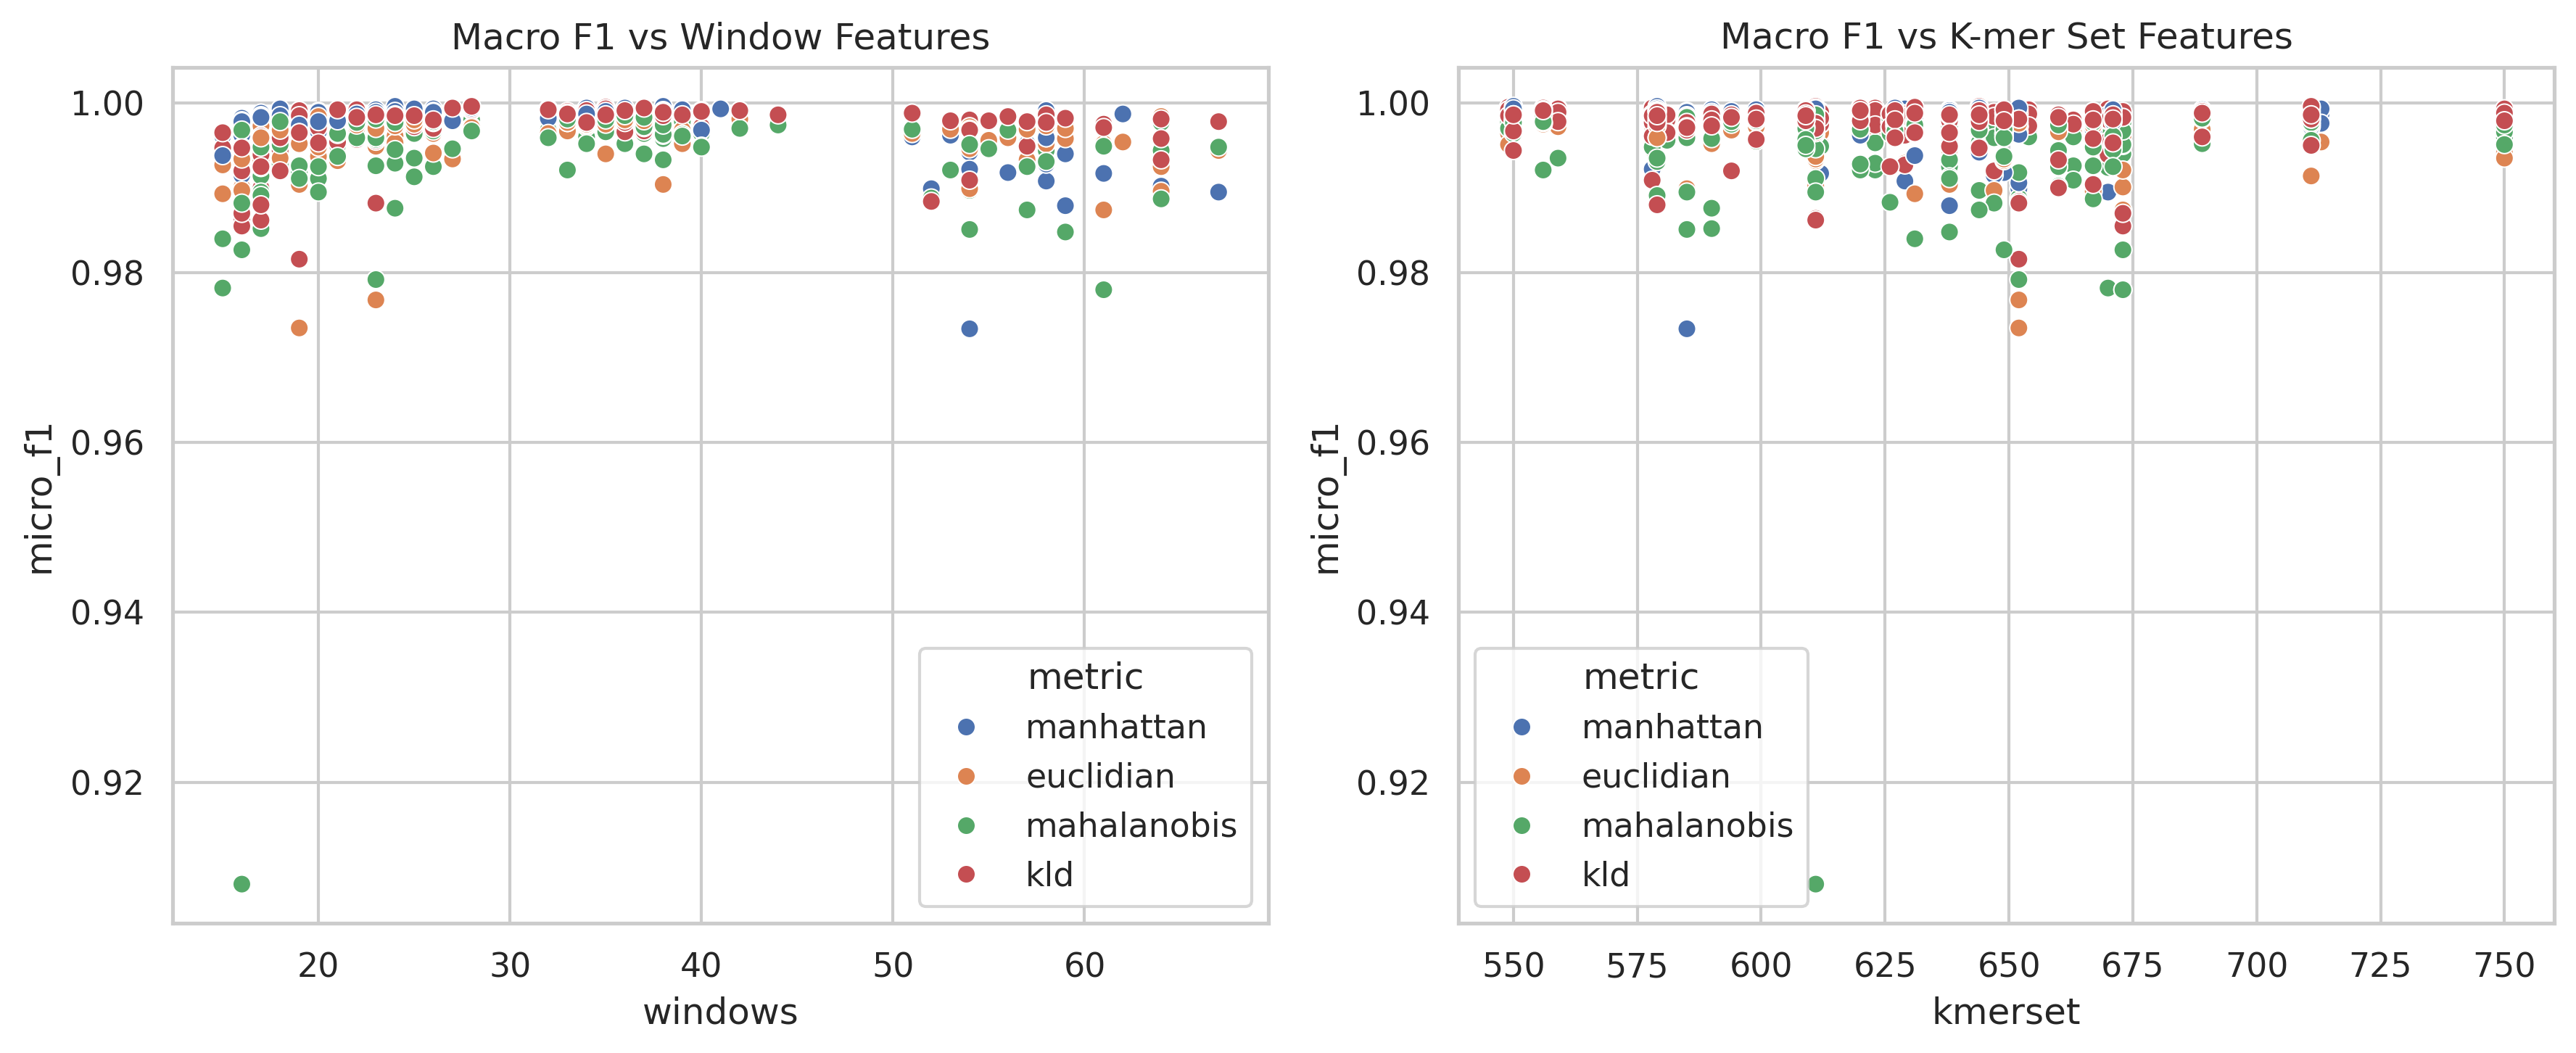

In [24]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df, x='windows', y='micro_f1', hue='metric', ax=axes[0])
axes[0].set_title("Macro F1 vs Window Features")
sns.scatterplot(data=df, x='kmerset', y='micro_f1', hue='metric', ax=axes[1])
axes[1].set_title("Macro F1 vs K-mer Set Features")
plt.tight_layout()
plt.show()

#### 4. Per-Class F1 Analysis

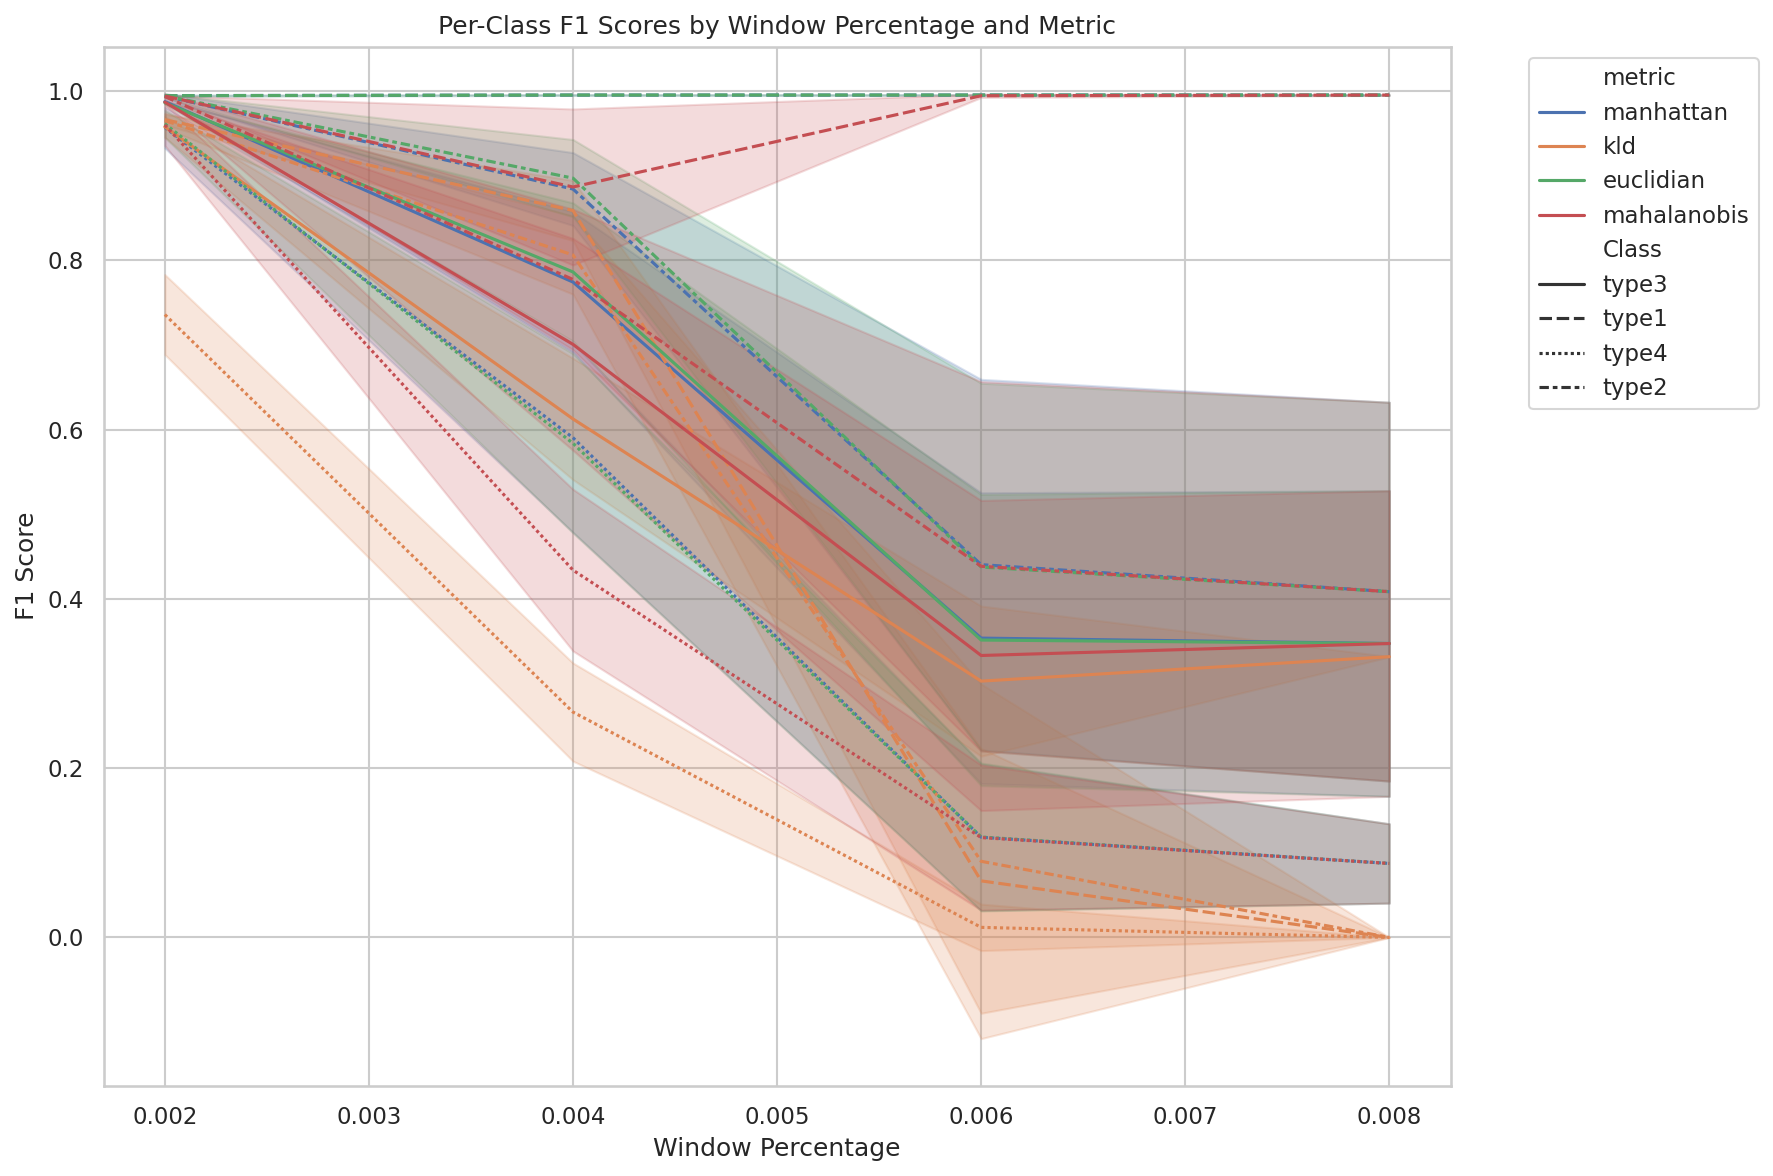

In [11]:

class_columns = [c for c in df.columns if c.startswith('type')]
df_melted = df.melt(
    id_vars=['wndwPercent', 'metric'],
    value_vars=class_columns,
    var_name='Class',
    value_name='F1_Score'
)

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='wndwPercent', y='F1_Score', hue='metric', 
            style='Class', errorbar='sd', estimator='mean')
plt.title("Per-Class F1 Scores by Window Percentage and Metric")
plt.xlabel("Window Percentage")
plt.ylabel("F1 Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 5. Summary Tables

In [12]:

print("\nAverage Metrics by Window Percentage and Classification Metric:")
summary_table = df.groupby(['wndwPercent', 'metric']).agg({
    'macro_f1': ['mean', 'std'],
    'macro_precision': ['mean', 'std'],
    'macro_recall': ['mean', 'std'],
    'windows': 'mean',
    'kmerset': 'mean'
}).round(3)
print(summary_table.to_string())


Average Metrics by Window Percentage and Classification Metric:
                        macro_f1        macro_precision        macro_recall        windows kmerset
                            mean    std            mean    std         mean    std    mean    mean
wndwPercent metric                                                                                
0.002       euclidian      0.984  0.004           0.979  0.007        0.990  0.003   67.27   40.19
            kld            0.906  0.015           0.871  0.017        0.970  0.005   67.27   40.19
            mahalanobis    0.984  0.007           0.978  0.011        0.990  0.003   67.27   40.19
            manhattan      0.983  0.007           0.977  0.010        0.990  0.003   67.27   40.19
0.004       euclidian      0.816  0.055           0.796  0.050        0.859  0.048    5.07   58.19
            kld            0.636  0.038           0.641  0.033        0.722  0.043    5.07   58.19
            mahalanobis    0.700  0.082     

#### 6. Correlation Analysis

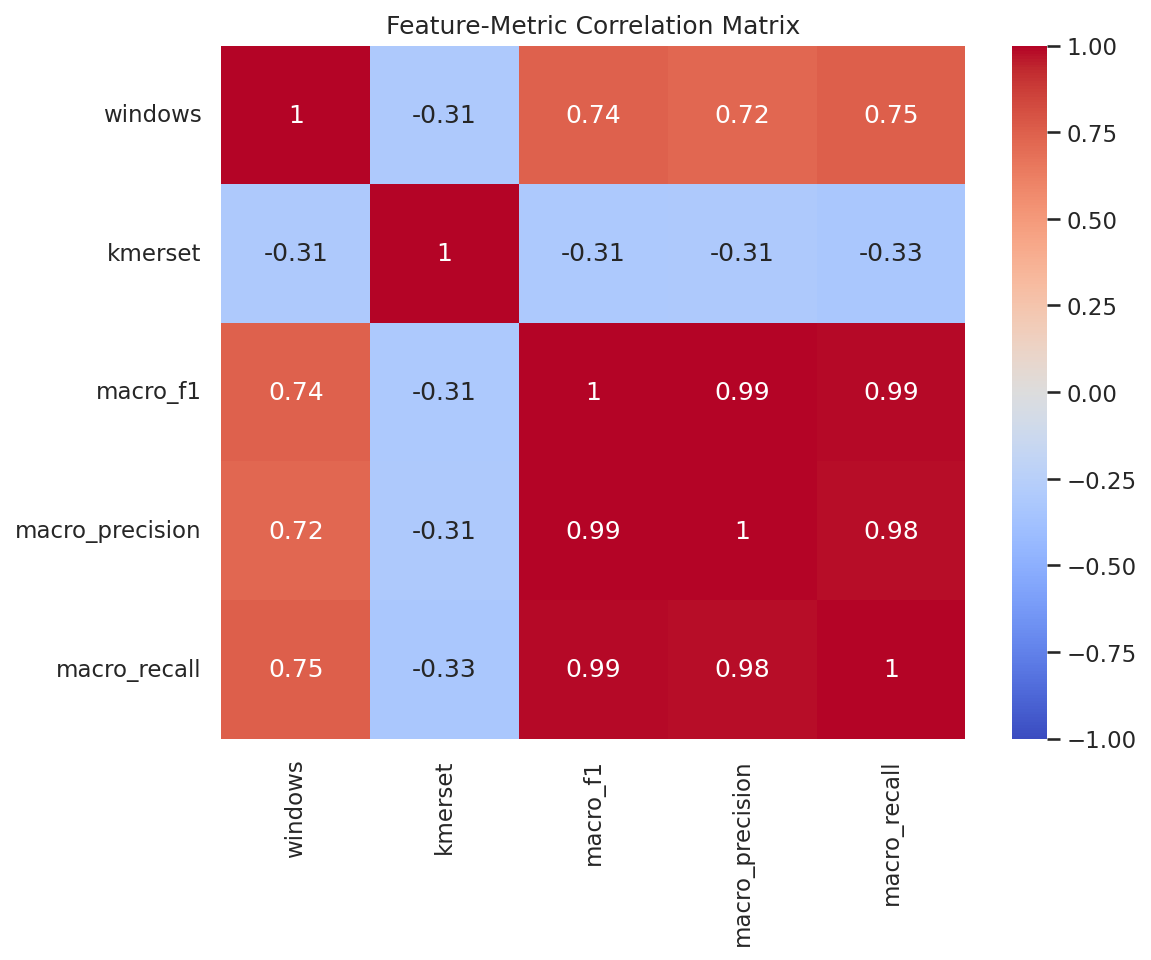

In [13]:

corr_matrix = df[['windows', 'kmerset', 'macro_f1', 'macro_precision', 'macro_recall']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature-Metric Correlation Matrix")
plt.show()

---

In [6]:
def computeConfusionMatrix(tool, n):
    print("Compute confusion matrices for " + tool + "_" + str(n) + "...")

    matrices = {}
    df = pd.read_csv(tool + "/" + "predict_data_" + str(n) + ".csv")
    
    y_pred = df["Predicted"].str.split('_').str[0]
    y_true = df["ID"].str.split('_').str[0]

    confusion_matrix_matrix_pred = confusion_matrix(y_true, y_pred, normalize="pred")

    matrices["confusion_matrix_matrix_pred"] = confusion_matrix_matrix_pred.tolist()

    save_path = tool + "/confusion_matrix/" + tool.split('/')[1] + "_" + str(n) + "_confusion_matrix_matrix_pred.json"
    with open(save_path, "w") as outfile:
        json.dump(matrices["confusion_matrix_matrix_pred"], outfile)

In [8]:
# file_names = ["word9_RF", "word9_SVM", "word15_RF", "word15_SVM"]
file_names = [denv_path]
for file in file_names:
    for n in range(1,101):
        computeConfusionMatrix(file, n)


Compute confusion matrices for ../GREAC/benchmark_results__1...


FileNotFoundError: [Errno 2] No such file or directory: '../GREAC/benchmark_results_/predict_data_1.csv'

In [21]:
hiv_metric = []
hiv_mean = []
hiv_standard_deviation = []

for n in range(1, 101): 
    with open(hiv_path + "/confusion_matrix/HIV_" + str(n) + "_confusion_matrix_matrix_pred.json") as data:
        hiv_metric.append(np.asarray(json.load(data)))

for i in range(0, 25):
    data = []
    for j in range(0, 25):
        data.append(hiv_metric[j].flatten()[i]) 
    hiv_mean.append(round(statistics.mean(data) * 100, 2))
    hiv_standard_deviation.append(round(statistics.stdev(data)*100, 2))
hiv_mean = np.asarray(hiv_mean).reshape(5,5)
hiv_standard_deviation = np.asarray(hiv_standard_deviation).reshape(5,5)

hiv_combined = [f"{i}\n± {j}" for i, j in zip(hiv_mean.flatten(), hiv_standard_deviation.flatten())]
hiv_combined = np.asarray(hiv_combined).reshape(5,5)

In [11]:
denv_metric = []
denv_mean = []
denv_standard_deviation = []

for n in range(1, 101): 
    with open(denv_path + "/confusion_matrix/DENV_" + str(n) + "_confusion_matrix_matrix_pred.json") as data:
        denv_metric.append(np.asarray(json.load(data)))

for i in range(0, 16):
    data = []
    for j in range(0, 16):
        data.append(denv_metric[j].flatten()[i]) 
    denv_mean.append(round(statistics.mean(data) * 100, 2))
    denv_standard_deviation.append(round(statistics.stdev(data)*100, 2))
denv_mean = np.asarray(denv_mean).reshape(4,4)
denv_standard_deviation = np.asarray(denv_standard_deviation).reshape(4,4)

denv_combined = [f"{i}\n± {j}" for i, j in zip(denv_mean.flatten(), denv_standard_deviation.flatten())]
denv_combined = np.asarray(denv_combined).reshape(4,4)

In [12]:
from math import sqrt
from operator import truediv
def get_metrics_from_conf_matrix(conf_mat):
    TP = np.diag(conf_mat)
    FP = conf_mat.sum(axis=0) - TP
    FN = conf_mat.sum(axis=1) - TP
    
    TN = conf_mat.sum() - (FP + FN + TP)
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensibilidade, taxa de acerto, recall ou taxa de true positive 
    TPR = list(map(truediv,TP,(TP+FN)))
    m_TPR = np.mean(TPR)
    print("Sensibilidade Recall:\t", m_TPR)
    
    # Especificidade ou taxa de true negative
    TNR = TN/(TN+FP) 
    m_TNR = np.mean(TNR)
    print("True Negative:\t", m_TNR)
    
    # Precisao
    PPV = list(map(truediv,TP,(TP+FP)))
    m_PPV = np.mean(PPV)
    print("Precisão:\t", m_PPV)
    
    # Predicao negativa
    NPV = TN/(TN+FN)
    m_NPV = np.mean(NPV)
    print("Pred. Negativa:\t", m_NPV)
    # False positive
    FPR = FP/(FP+TN)
    m_FPR = np.mean(FPR)
    print("False Positive: ", m_FPR)
    # False negative
    FNR = FN/(TP+FN)
    m_FNR = np.mean(FNR)
    print("False Negative:\t", m_FNR)
    # False discovery
    FDR = FP/(TP+FP)
    m_FDR = np.mean(FDR)
    print("F Discovery:\t", m_FDR)
    # Accuracy for each class
    ACC = list(map(truediv,(TP+TN),(TP+FP+FN+TN)))
    m_ACC = np.mean(ACC)
    print("Acurácia:\t", m_ACC)

    x = (m_TPR + m_FPR) * (m_TPR + m_FNR) * (m_TNR + m_FPR) * (m_TNR + m_FNR)
    mcc = ((m_TPR * m_TNR) - (m_FPR * m_FNR)) / sqrt(x)

    f1 = 2 * ((m_PPV * m_TPR) / (m_PPV + m_TPR))
    print("F1:\t", f1)
    print("MCC:\t", mcc)
    return m_ACC, f1, m_TPR, m_PPV, mcc


[Text(0, 0.5, 'Type 1'),
 Text(0, 1.5, 'Type 2'),
 Text(0, 2.5, 'Type 3'),
 Text(0, 3.5, 'Type 4')]

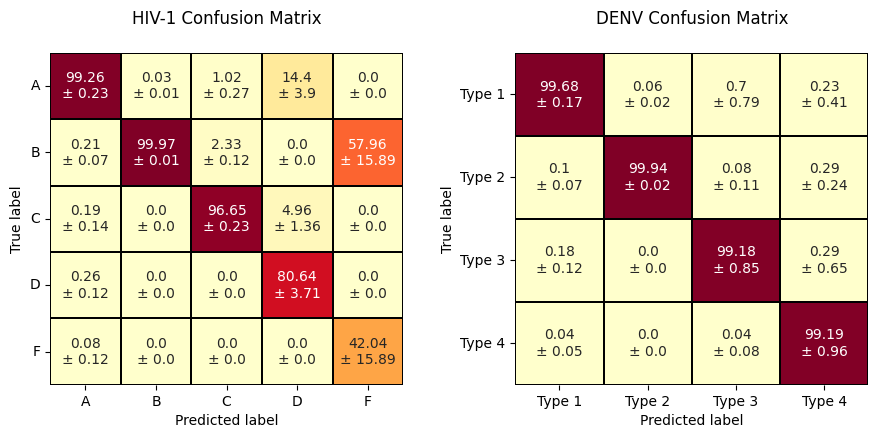

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout(pad=5.0)

classes_hiv = ["A", "B", "C", "D", "F"]
classes_denv = ['Type 1', 'Type 2', 'Type 3', 'Type 4']

sns.heatmap(ax=axes[0],
            data=hiv_mean,
            annot=hiv_combined,
            fmt="",
            cmap='YlOrRd',
            linecolor="black",
            linewidths=.1,
            cbar=False)
sns.heatmap(ax=axes[1],
            data=denv_mean,
            annot=denv_combined, 
            fmt="",
            cmap='YlOrRd',
            linecolor="black",
            linewidths=.1,
            cbar=False)

# Titles
axes[0].set_title("HIV-1 Confusion Matrix\n")
axes[1].set_title("DENV Confusion Matrix\n")

# X ticks labels
axes[0].set_xticklabels(["A", "B", "C", "D", "F"])
axes[1].set_xticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'])

# X and Y Labels
axes[0].set_ylabel("True label")
axes[0].set_xlabel("Predicted label")
axes[1].set_ylabel("True label")
axes[1].set_xlabel("Predicted label")

# Y ticks labels
axes[0].yaxis.set_ticklabels(["A", "B", "C", "D", "F"], rotation=0)
axes[1].yaxis.set_ticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'], rotation=0)


[Text(0, 0.5, 'Type 1'),
 Text(0, 1.5, 'Type 2'),
 Text(0, 2.5, 'Type 3'),
 Text(0, 3.5, 'Type 4')]

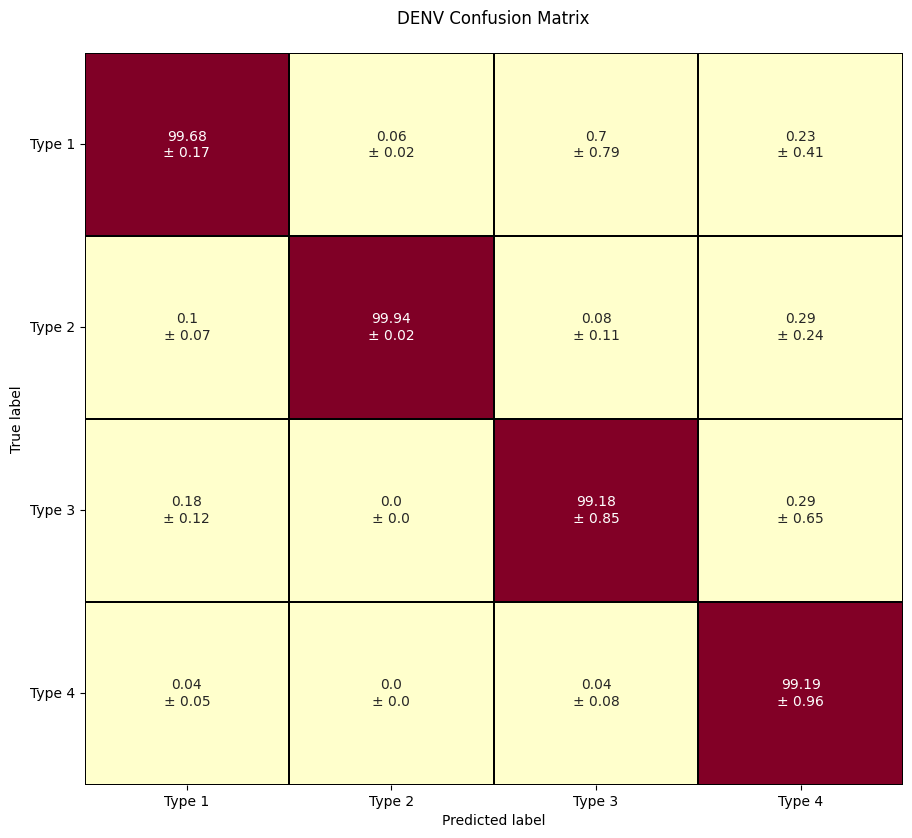

In [43]:
fig, axes = plt.subplots(1, 1, figsize=(10,9))
fig.tight_layout(pad=5.0)

classes_denv = ['Type 1', 'Type 2', 'Type 3', 'Type 4']


sns.heatmap(ax=axes,
            data=denv_mean,
            annot=denv_combined, 
            fmt="",
            cmap='YlOrRd',
            linecolor="black",
            linewidths=.1,
            cbar=False)

# Titles
axes.set_title("DENV Confusion Matrix\n")

# X ticks labels
axes.set_xticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'])

# X and Y Labels
axes.set_ylabel("True label")
axes.set_xlabel("Predicted label")

# Y ticks labels
axes.yaxis.set_ticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'], rotation=0)


(0.4, 1.0)

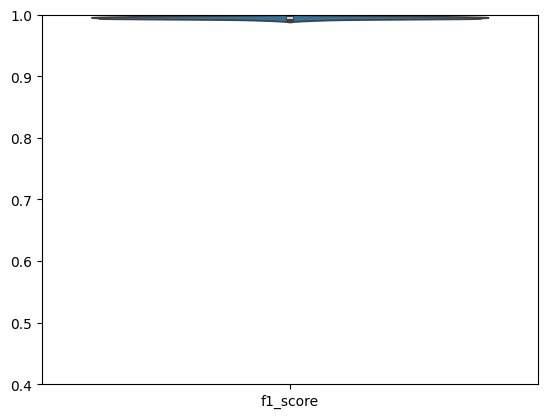

In [ ]:

metrics = ['precision', 'recall', 'f1_score', 'accuracy']
ax = sns.violinplot(data=[denv['f1_score']])
ax.set_ylim([0.4,1])


<Axes: >

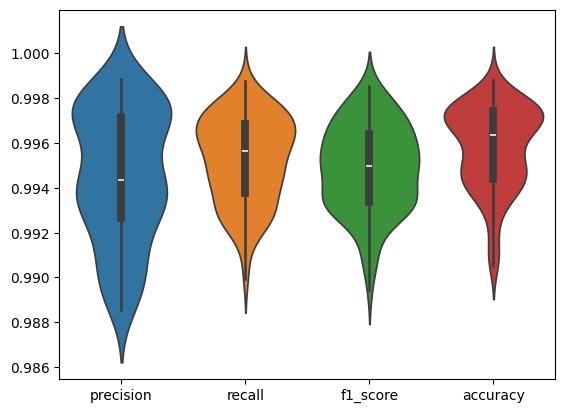

In [9]:
sns.violinplot(denv[metrics])

/tmp/ipykernel_12033/2006939136.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Precision', 'Recall', 'F1-Score', 'Accuracy'])


[Text(0, 0.5, 'Type 1'),
 Text(0, 1.5, 'Type 2'),
 Text(0, 2.5, 'Type 3'),
 Text(0, 3.5, 'Type 4')]

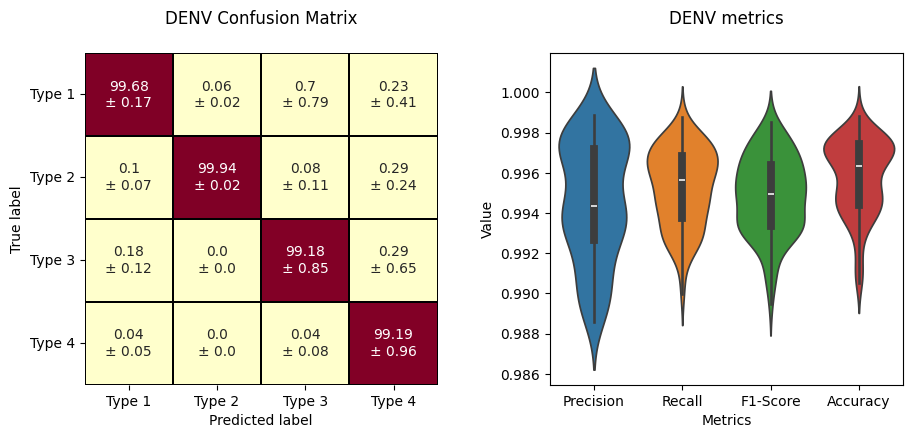

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout(pad=5.0)

classes_denv = ['Type 1', 'Type 2', 'Type 3', 'Type 4']


sns.heatmap(ax=axes[0],
            data=denv_mean,
            annot=denv_combined, 
            fmt="",
            cmap='YlOrRd',
            linecolor="black",
            linewidths=.1,
            cbar=False)

sns.violinplot(ax=axes[1],
               data=denv[metrics])

# Titles
axes[0].set_title("DENV Confusion Matrix\n")
axes[1].set_title("DENV metrics\n")

# X ticks labels
axes[0].set_xticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'])
axes[1].set_xticklabels(['Precision', 'Recall', 'F1-Score', 'Accuracy'])

# X and Y Labels
axes[0].set_ylabel("True label")
axes[0].set_xlabel("Predicted label")
axes[1].set_ylabel("Value")
axes[1].set_xlabel("Metrics")

# Y ticks labels
axes[0].yaxis.set_ticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'], rotation=0)
